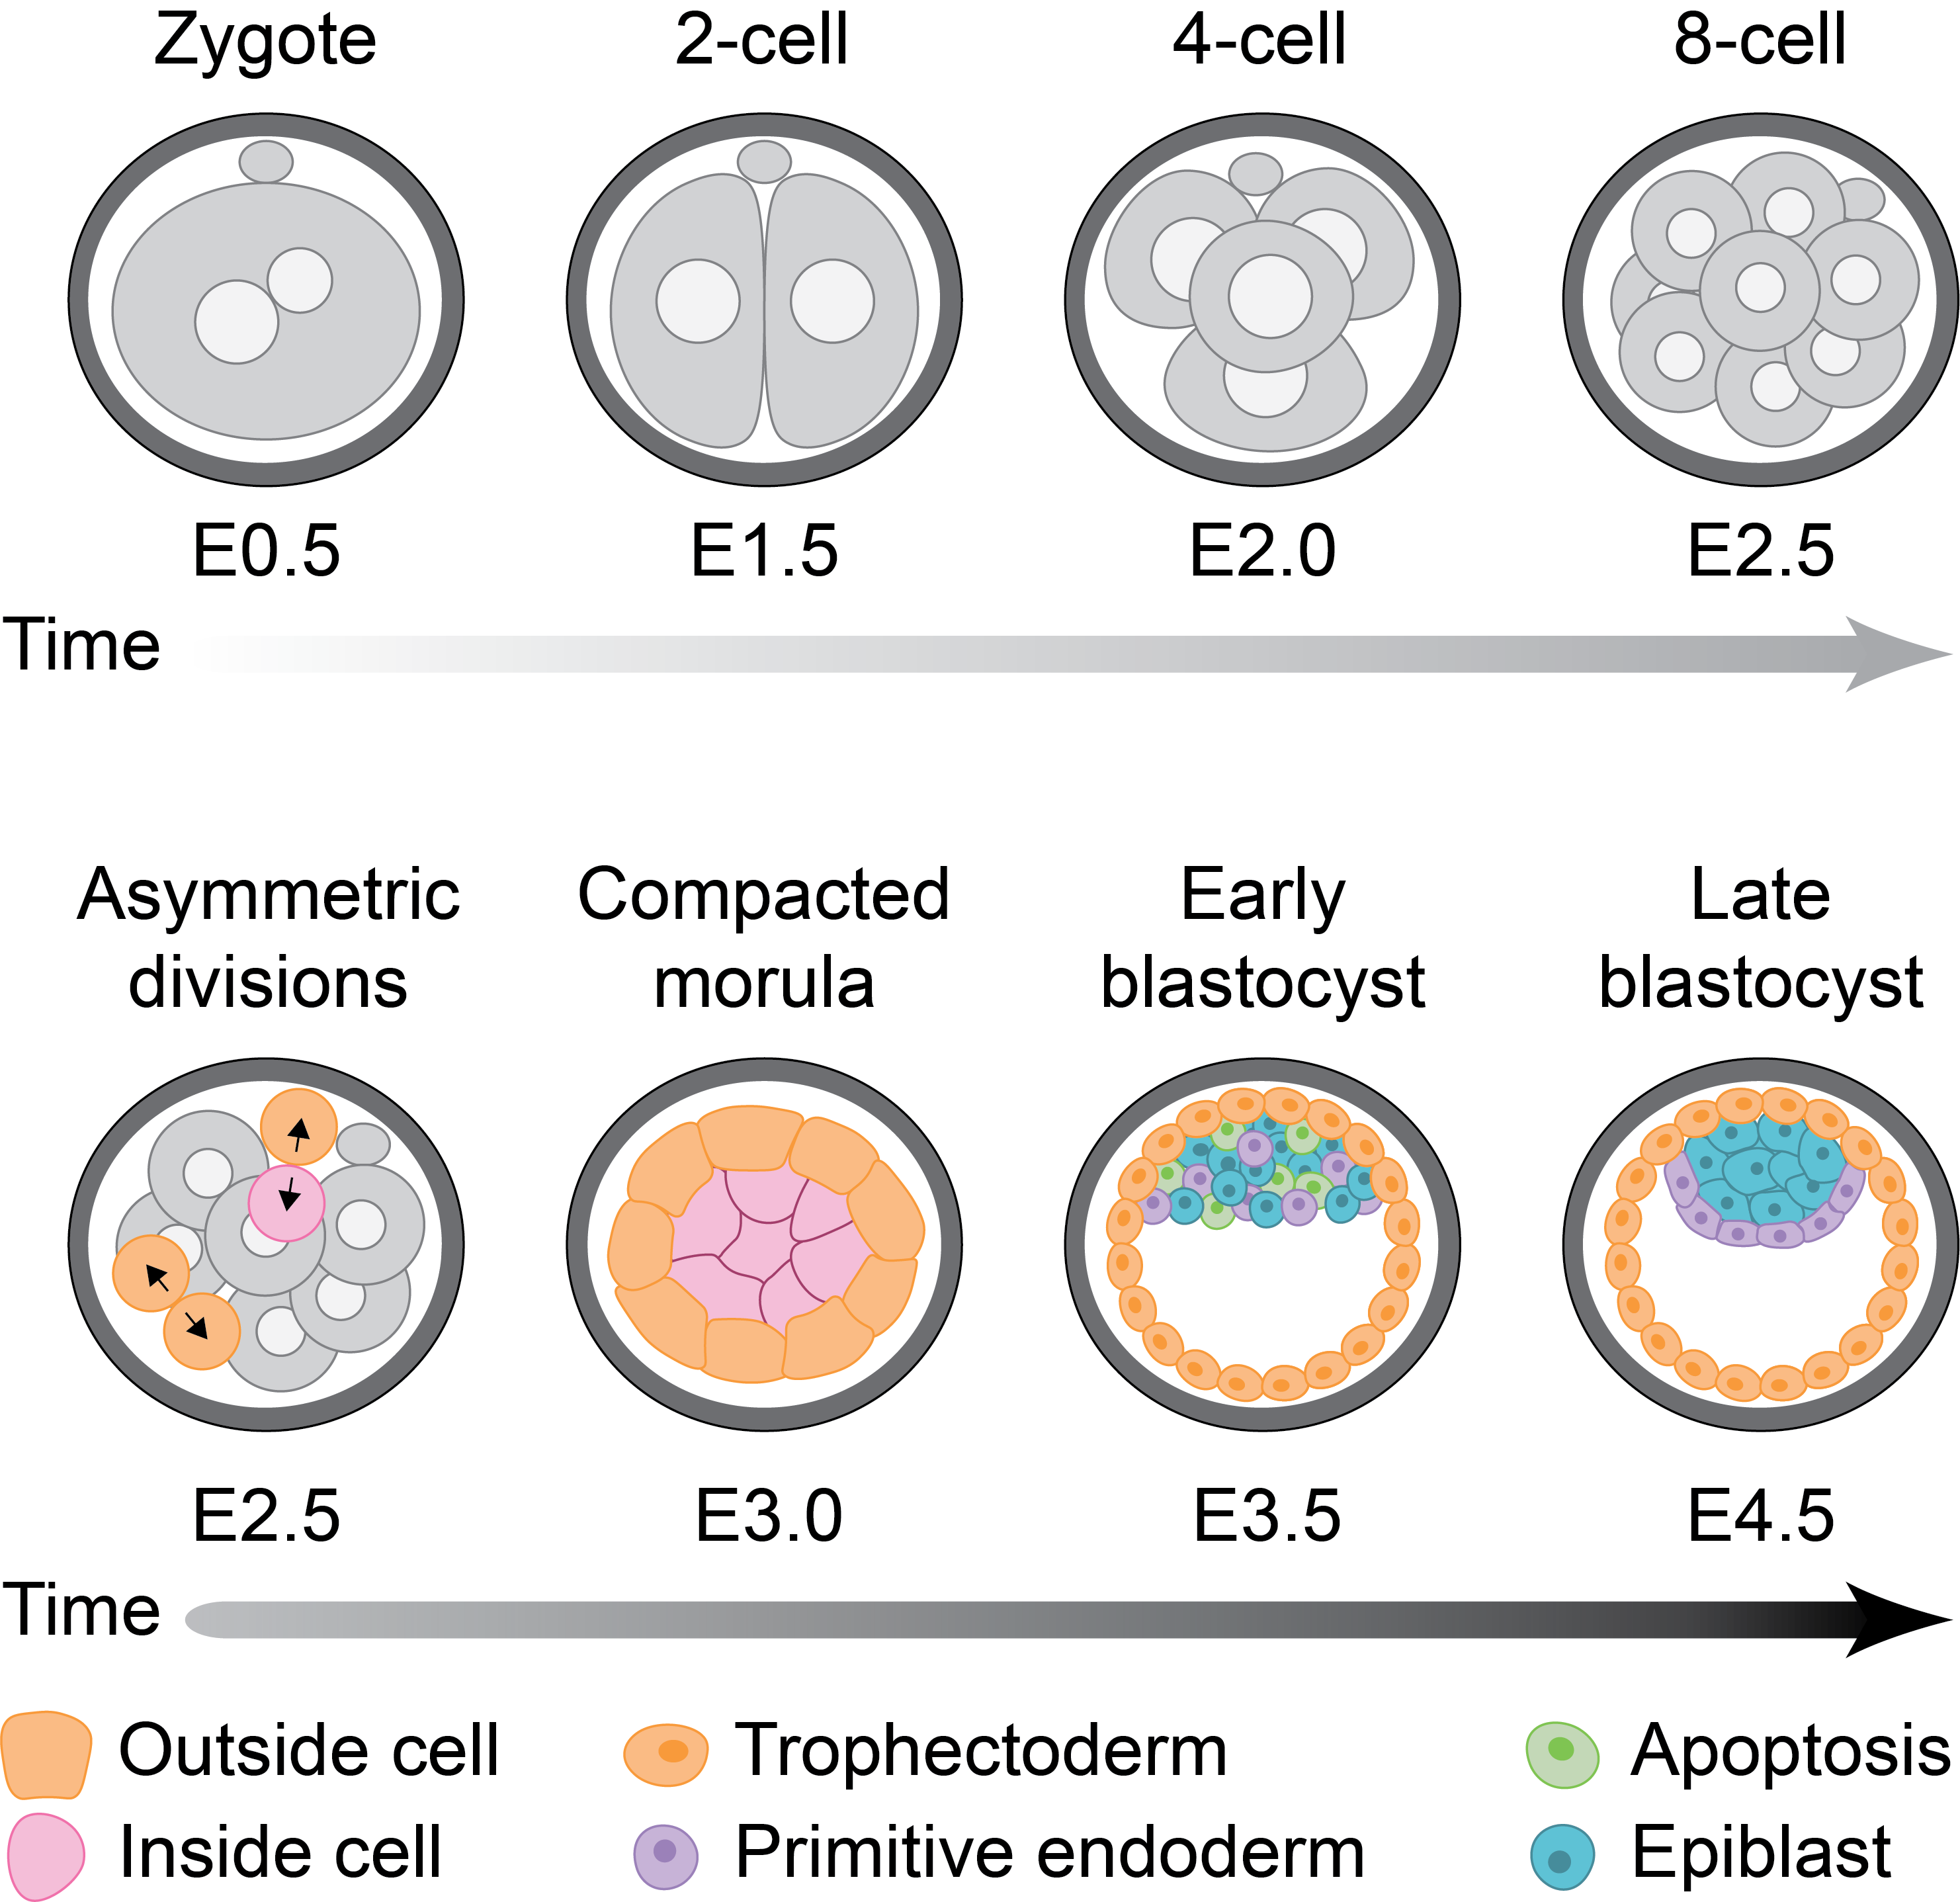

In [1]:
import lma.resample as resample
import lma.plot as plot

First, we will import the mouse blastocyst dataset, [Morris et al., 2010](https://www.pnas.org/doi/full/10.1073/pnas.0915063107). This dataset consists of 337 trees, acquired by confocal time lapse microscopy of 20 mouse embryos developing from 8-cell stage to blastocyst stage (~55h). During this time period, a series of asymmetric cleavages to give rise to inside and outside cells, where inside cells will give rise to the inner cell mass and outside cells will give rise to trophectoderm (abbreviated T). The internalized cells then undertake a second cell fate decision to give rise to either epiblast or primitive endoderm (abbreviated E and P respectively).

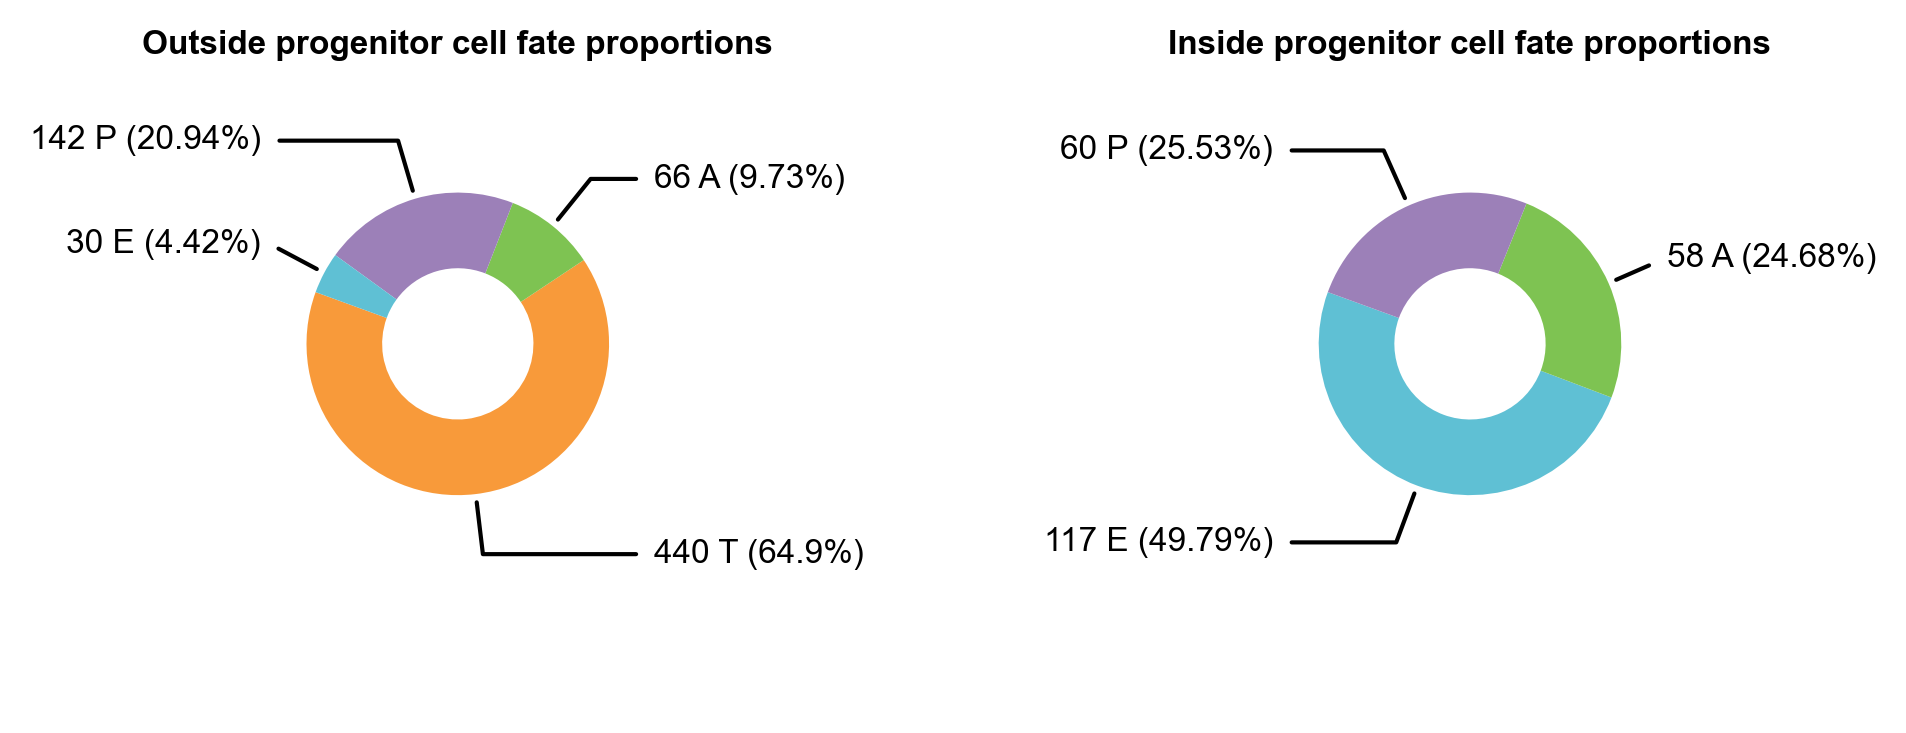

The data should first be formatted into a list where each entry is a tree is represented in [NEWICK format](https://evolution.genetics.washington.edu/phylip/newicktree.html), without branch lengths or interior nodes, separated by semi-colons.

Here, we have different datasets corresponding to progenitors that started on the outside or inside of the embryo at 8-cell stage. We will load these together using the `multi_dataset_resample_trees` function. This function will resample the dataset `num_resamples` times with replacement, automatically detect all cell fates across all provided datasets (or can take a list of input cell fates to use) and count the number of subtree occurences for each doublet, triplet, or quartet. 

It will output the subtree dictionary, a list of the detected cell fates, and a DataFrame that lists the number of occurrences for each subtree in each resample and in the original dataset. The DataFrame will also contain the expected number of occurrences for each subtree based on the probabilities of observing each of its constituent cell fates and contain labels corresponding to which dataset each line corresponds to.

In [2]:
datasets = ['datasets/mouse_blastocyst_outside.txt',
            'datasets/mouse_blastocyst_inside.txt']

dataset_names = ['Outside progenitors', 'Inside progenitors']

## Doublet motif analysis

In [3]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_c) = resample.multi_dataset_resample_trees(datasets, 
                                                        dataset_names,
                                                        'doublet',
                                                        num_resamples=10000, 
                                                        replacement_bool=True,
                                                        cell_fates='auto',
                                                        )

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [4]:
subtree_dict

{'(A,A)': 0,
 '(A,E)': 1,
 '(A,P)': 2,
 '(A,T)': 3,
 '(E,E)': 4,
 '(E,P)': 5,
 '(E,T)': 6,
 '(P,P)': 7,
 '(P,T)': 8,
 '(T,T)': 9}

In [5]:
cell_fates

['A', 'E', 'P', 'T']

In [6]:
dfs_dataset_c.head()

,0,1,2,3,4,5,6,7,8,9,...,9993,9994,9995,9996,9997,9998,9999,observed,expected,dataset
0,1.0,6.0,1.0,2,4.0,3,3.0,4,2,1.0,...,4,4,4.0,1.0,2.0,4.0,2.0,13.0,2.511160,Outside progenitors
1,4.0,1.0,0.0,3,1.0,4,4.0,2,1,0.0,...,3,3,2.0,0.0,4.0,3.0,2.0,6.0,2.282873,Outside progenitors
2,16.0,11.0,20.0,11,14.0,10,18.0,13,9,16.0,...,9,7,18.0,9.0,3.0,12.0,14.0,19.0,10.805597,Outside progenitors
3,37.0,37.0,33.0,28,36.0,29,26.0,28,28,31.0,...,33,42,30.0,27.0,42.0,42.0,30.0,4.0,33.482131,Outside progenitors
4,0.0,0.0,1.0,1,0.0,1,0.0,1,1,1.0,...,3,1,0.0,1.0,0.0,0.0,0.0,6.0,0.518835,Outside progenitors


We will now reformat the DataFrame for plotting. The next function `multi_dataset_dfs_for_plotting` generates several DataFrames.

1. `df_true_melt_dataset_label_c_c` will contain various characteristics about each of the subtrees (i.e., the observed and expected number, z-score, adjusted p-value, etc.)

2. `df_melt_subset_c_c` will contain the number of occurences for each subtree in all of the resamples.

3. `df_melt_100resamples_subset_c_c` will contain the number of occurences for each subtree in only 100 resamples.

4. `df_null_zscores_i_c_melt_subset_c_c` will contain the null z-score for each subtree in `num_null` resamples. The null z-scores are calculated by comparison of each resample set to the rest of the resample sets.

5. `df_null_zscores_i_c_melt_100resamples_subset_c_c` will contain the null z-score for each subtree in 100 resamples.

We can also specify a cutoff number for how many subtrees we would like to include in the final plot. We can use `None` to keep all subtrees, `auto` to keep all subtrees with an absolute z-score above 1, or any number of top significant subtrees to keep (in order of highest to lowest absolute z-score).

In [7]:
(df_true_melt_dataset_label_c_c,
 df_melt_subset_c_c, 
 df_melt_100resamples_subset_c_c,
 df_null_zscores_i_c_melt_subset_c_c,
 df_null_zscores_i_c_melt_100resamples_subset_c_c) = plot.multi_dataset_dfs_for_plotting(dfs_dataset_c, 
                                                                                        dataset_names, 
                                                                                        10000, 
                                                                                        subtree_dict,
                                                                                        cutoff='auto',
                                                                                        num_null=100)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
df_true_melt_dataset_label_c_c.head()

,subtree_val,observed,expected,z-score,abs z-score,label,null min,null mean,null max,p_val,adj_p_val_fdr_bh,adj_p_val_fdr_tsbh,dataset,null z-score min,null z-score mean,null z-score max
7,7,46.0,11.624203,10.314256,10.314256,"(P,P)",2.0,11.6264,25.0,0.000100,0.000167,0.000017,Outside progenitors,-1.988832,0.028107,2.213199
4,4,6.0,0.518835,7.530434,7.530434,"(E,E)",0.0,0.5266,6.0,0.000200,0.000286,0.000029,Outside progenitors,-0.724564,-0.009053,2.027657
0,0,13.0,2.511160,6.637942,6.637942,"(A,A)",0.0,2.5146,11.0,0.000100,0.000167,0.000017,Outside progenitors,-1.592187,-0.021892,2.840838
9,9,155.0,111.607104,5.412107,5.412107,"(T,T)",78.0,111.7123,144.0,0.000100,0.000167,0.000017,Outside progenitors,-2.465431,-0.057810,2.162033
2,2,19.0,10.805597,2.562843,2.562843,"(A,P)",2.0,10.7974,27.0,0.012597,0.015747,0.001575,Outside progenitors,-2.437086,0.157068,2.876619


In [9]:
df_melt_subset_c_c.head()

,subtree_val,observed,label,dataset
70000,7,18.0,"(P,P)",Outside progenitors
70001,7,9.0,"(P,P)",Outside progenitors
70002,7,14.0,"(P,P)",Outside progenitors
70003,7,12.0,"(P,P)",Outside progenitors
70004,7,13.0,"(P,P)",Outside progenitors


In [10]:
df_melt_100resamples_subset_c_c.head()

,subtree_val,observed,label,dataset
700,7,18.0,"(P,P)",Outside progenitors
701,7,9.0,"(P,P)",Outside progenitors
702,7,14.0,"(P,P)",Outside progenitors
703,7,12.0,"(P,P)",Outside progenitors
704,7,13.0,"(P,P)",Outside progenitors


In [11]:
df_null_zscores_i_c_melt_subset_c_c.head()

,subtree_val,observed,label,dataset
700,7,1.912929,"(P,P)",Outside progenitors
701,7,-0.788150,"(P,P)",Outside progenitors
702,7,0.712284,"(P,P)",Outside progenitors
703,7,0.112109,"(P,P)",Outside progenitors
704,7,0.412191,"(P,P)",Outside progenitors


In [12]:
df_null_zscores_i_c_melt_100resamples_subset_c_c.head()

,subtree_val,observed,label,dataset
700,7,1.912929,"(P,P)",Outside progenitors
701,7,-0.788150,"(P,P)",Outside progenitors
702,7,0.712284,"(P,P)",Outside progenitors
703,7,0.112109,"(P,P)",Outside progenitors
704,7,0.412191,"(P,P)",Outside progenitors


We will specify a dictionary of cell fates with assigned colors for plotting purposes.

In [14]:
cell_fates

['A', 'E', 'P', 'T']

In [15]:
cell_color_dict = plot.make_color_dict(cell_fates, ['#7EC352', 
                                                    '#5FC0D4', 
                                                    '#9C80B8', 
                                                    '#F89A3A',
                                                    ])

We can plot the frequency and deviation plot using the DataFrame outputs from `dfs_for_plotting` and cell color dictionary for individual datasets.

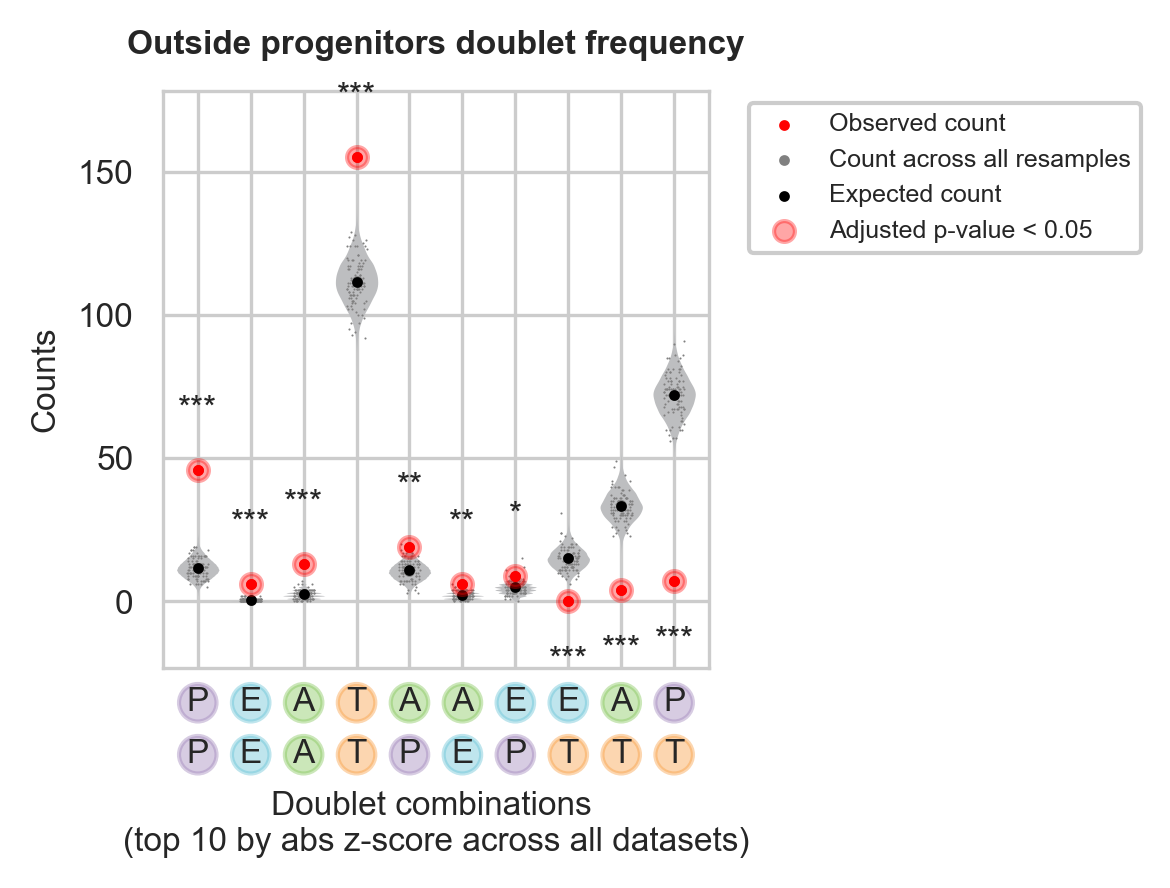

In [16]:
plot.plot_frequency('doublet', 
                    df_true_melt_dataset_label_c_c.loc[df_true_melt_dataset_label_c_c['dataset']=='Outside progenitors'], 
                    df_melt_subset_c_c.loc[df_melt_subset_c_c['dataset']=='Outside progenitors'], 
                    df_melt_100resamples_subset_c_c.loc[df_melt_100resamples_subset_c_c['dataset']=='Outside progenitors'], 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff='auto', 
                    title='Outside progenitors doublet frequency',
                    multiple_datasets=True,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

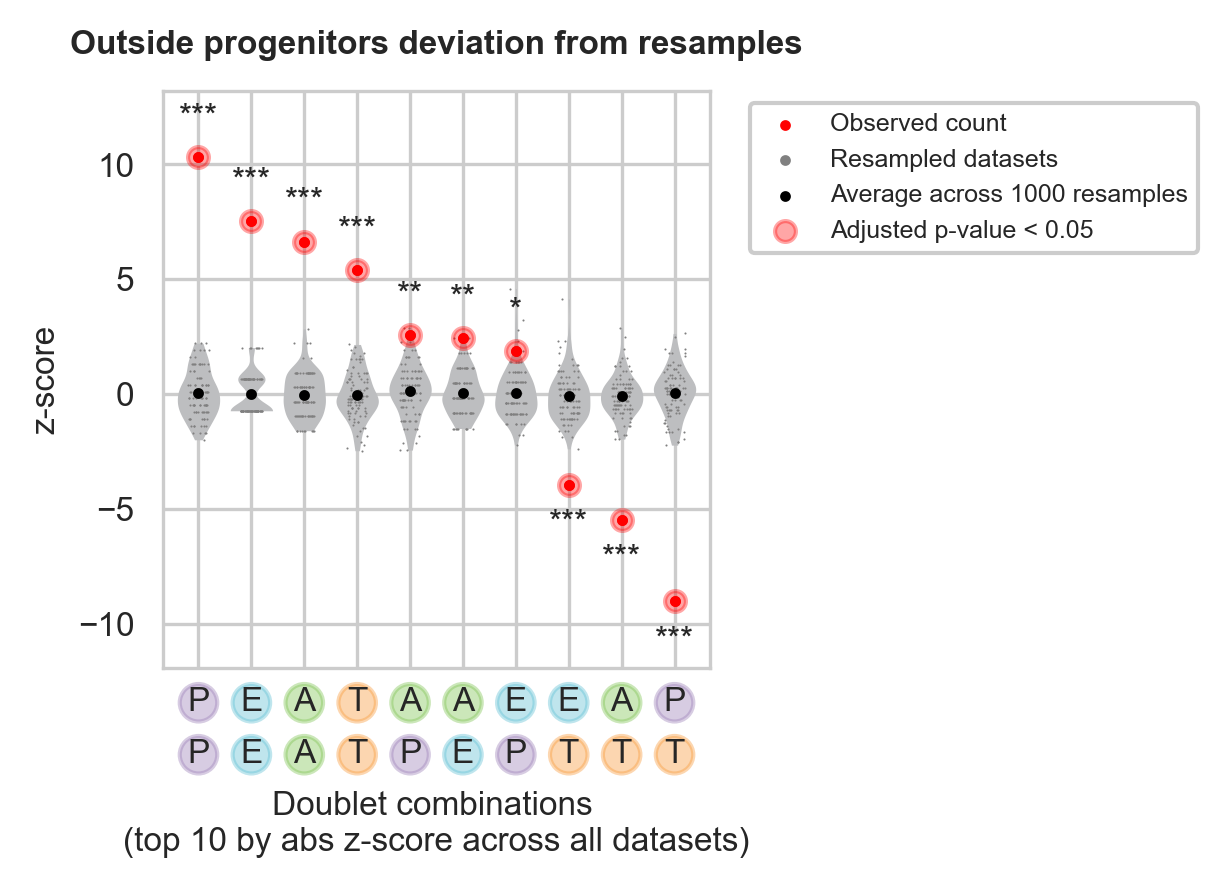

In [17]:
plot.plot_deviation('doublet', 
                    df_true_melt_dataset_label_c_c.loc[df_true_melt_dataset_label_c_c['dataset']=='Outside progenitors'], 
                    df_null_zscores_i_c_melt_subset_c_c.loc[df_null_zscores_i_c_melt_subset_c_c['dataset']=='Outside progenitors'], 
                    df_null_zscores_i_c_melt_100resamples_subset_c_c.loc[df_null_zscores_i_c_melt_100resamples_subset_c_c['dataset']=='Outside progenitors'], 
                    cell_color_dict,
                    fdr_type='fdr_tsbh',
                    cutoff='auto', 
                    title='Outside progenitors deviation from resamples',
                    multiple_datasets=True,
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

We can also plot motif frequency and deviation across multiple datasets using the DataFrame outputs from `dfs_for_plotting` and cell color dictionary. Let's also specify a dataset color dictionary.

In [18]:
dataset_color_dict = plot.make_color_dict(dataset_names, ['#F89A3A', 
                                                          '#A23D6B', 
                                                          ])

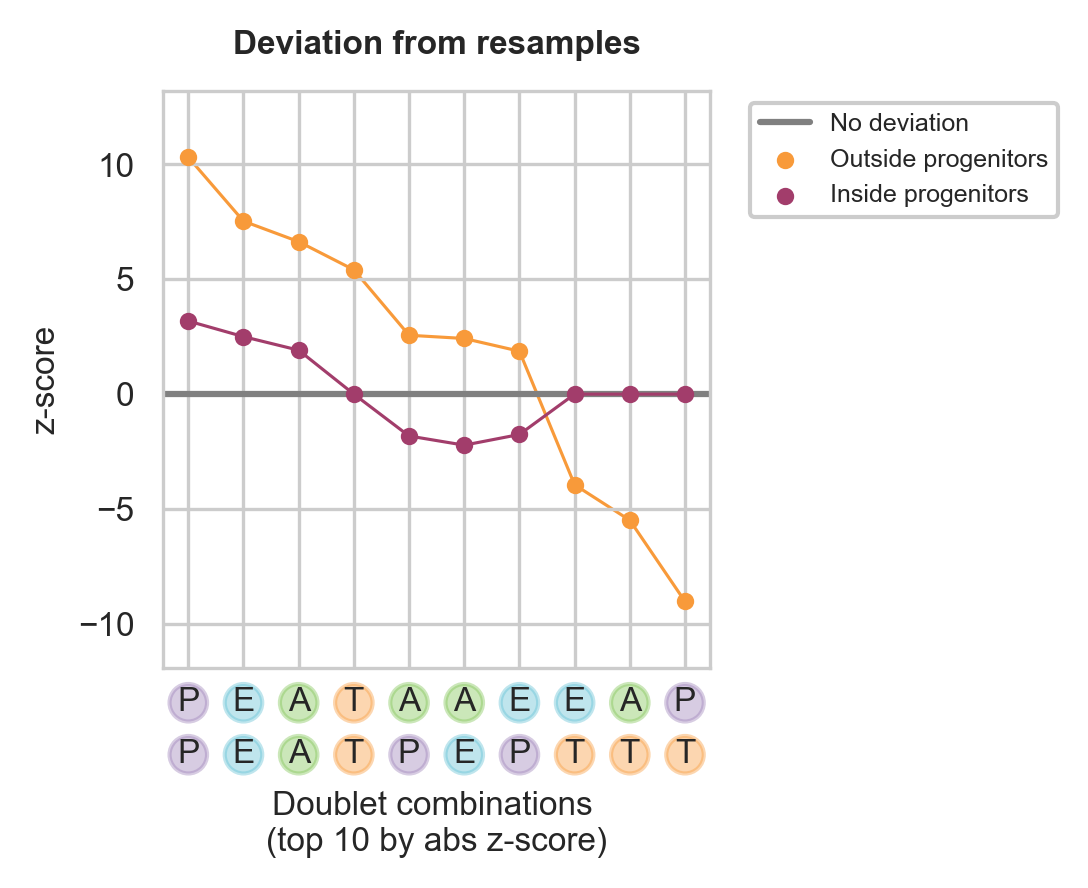

In [19]:
plot.multi_dataset_plot_deviation('doublet', 
                                  dataset_names,
                                  df_true_melt_dataset_label_c_c, 
                                  dataset_color_dict,
                                  cell_color_dict,
                                  cutoff='auto', 
                                  title='auto',
                                  legend_bool=True,
                                  legend_pos='outside',
                                  save=False, 
                                  image_format='png',
                                  dpi=300,
                                  image_save_path=None)

## Triplet motif analysis

In [20]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_c) = resample.multi_dataset_resample_trees(datasets, 
                                                        dataset_names,
                                                        'triplet',
                                                        num_resamples=10000, 
                                                        replacement_bool=True, 
                                                        )

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [21]:
(df_true_melt_dataset_label_c_c,
 df_melt_subset_c_c, 
 df_melt_100resamples_subset_c_c,
 df_null_zscores_i_c_melt_subset_c_c,
 df_null_zscores_i_c_melt_100resamples_subset_c_c) = plot.multi_dataset_dfs_for_plotting(dfs_dataset_c, 
                                                                                        dataset_names, 
                                                                                        10000, 
                                                                                        subtree_dict,
                                                                                        cutoff=15,
                                                                                        num_null=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

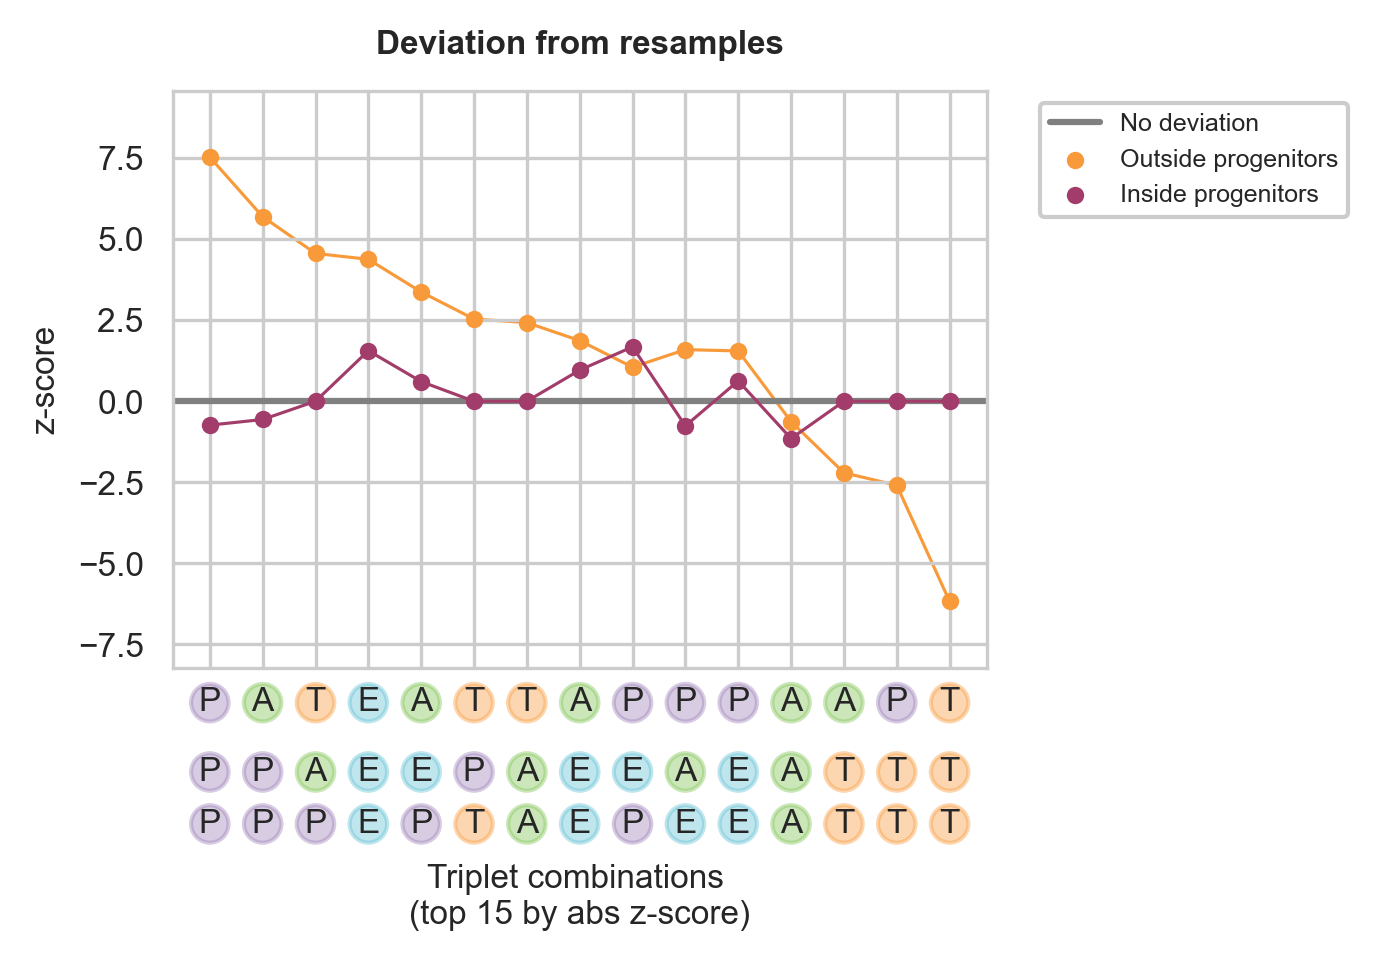

In [22]:
plot.multi_dataset_plot_deviation('triplet', 
                                  dataset_names,
                                  df_true_melt_dataset_label_c_c, 
                                  dataset_color_dict,
                                  cell_color_dict,
                                  cutoff=15, 
                                  title='auto',
                                  legend_bool=True,
                                  legend_pos='outside',
                                  save=False, 
                                  image_format='png',
                                  dpi=300,
                                  image_save_path=None)

## Quartet motif analysis

In [23]:
(subtree_dict, 
 cell_fates, 
 dfs_dataset_c) = resample.multi_dataset_resample_trees(datasets, 
                                                        dataset_names,
                                                        'quartet',
                                                        num_resamples=10000, 
                                                        replacement_bool=True, 
                                                        )

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

In [24]:
(df_true_melt_dataset_label_c_c,
 df_melt_subset_c_c, 
 df_melt_100resamples_subset_c_c,
 df_null_zscores_i_c_melt_subset_c_c,
 df_null_zscores_i_c_melt_100resamples_subset_c_c) = plot.multi_dataset_dfs_for_plotting(dfs_dataset_c, 
                                                                                        dataset_names, 
                                                                                        10000, 
                                                                                        subtree_dict,
                                                                                        cutoff=15,
                                                                                        num_null=1)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

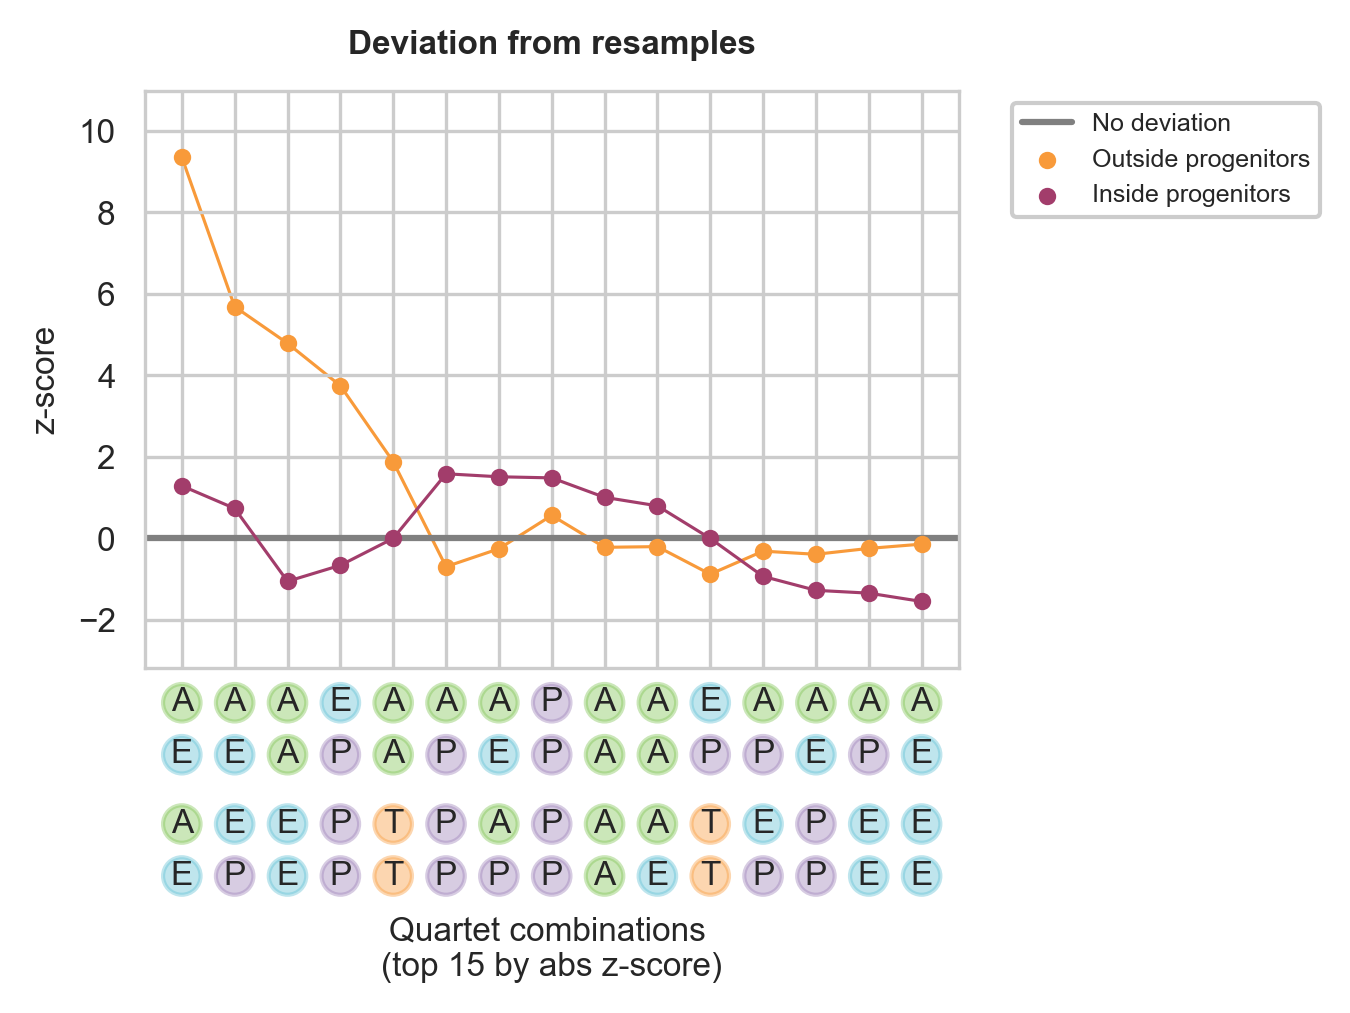

In [25]:
plot.multi_dataset_plot_deviation('quartet', 
                                  dataset_names,
                                  df_true_melt_dataset_label_c_c, 
                                  dataset_color_dict,
                                  cell_color_dict,
                                  cutoff=15, 
                                  title='auto',
                                  legend_bool=True,
                                  legend_pos='outside',
                                  save=False, 
                                  image_format='png',
                                  dpi=300,
                                  image_save_path=None)